In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [5]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/notebooks/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [6]:
encoder = info.features['text'].encoder

In [7]:
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [8]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [9]:
assert original_string == sample_string

In [10]:
for index in encoded_string:
  print ('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [11]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [12]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [13]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [15]:

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 64s 162ms/step - loss: 0.6548 - accuracy: 0.5814 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 57s 146ms/step - loss: 0.3421 - accuracy: 0.8614 - val_loss: 0.3236 - val_accuracy: 0.8635
Epoch 3/10
391/391 [==============================] - 57s 146ms/step - loss: 0.2499 - accuracy: 0.9070 - val_loss: 0.3023 - val_accuracy: 0.8776
Epoch 4/10
391/391 [==============================] - 58s 148ms/step - loss: 0.2052 - accuracy: 0.9268 - val_loss: 0.3062 - val_accuracy: 0.8792
Epoch 5/10
391/391 [==============================] - 58s 147ms/step - loss: 0.1774 - accuracy: 0.9384 - val_loss: 0.3183 - val_accuracy: 0.8714
Epoch 6/10
391/391 [==============================] - 58s 148ms/step - loss: 0.1602 - accuracy: 0.9466 - val_loss: 0.3333 - val_accuracy: 0.8734
Epoch 7/10
391/391 [==============================] - 58s 148ms/step - loss: 0.1454 - accuracy: 0.9513 - val_loss: 0.3554 

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 26s 66ms/step - loss: 0.4256 - accuracy: 0.8581
Test Loss: 0.42559686575628
Test Accuracy: 0.8581200242042542


In [17]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

def sample_predict(sentence, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [18]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.45302004]]


In [19]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.38017613]]


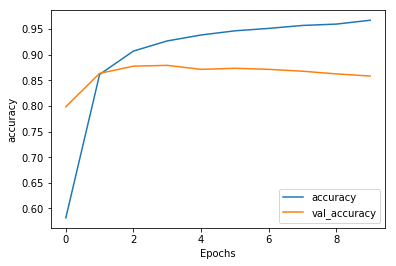

In [20]:
plot_graphs(history, 'accuracy')

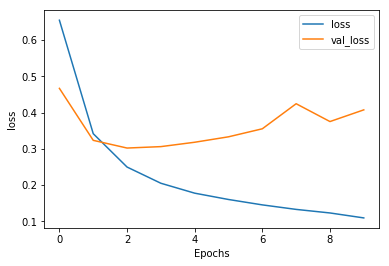

In [21]:
plot_graphs(history, 'loss')

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [24]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 108s 275ms/step - loss: 0.6842 - accuracy: 0.5372 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 103s 263ms/step - loss: 0.3960 - accuracy: 0.8378 - val_loss: 0.3301 - val_accuracy: 0.8682
Epoch 3/10
391/391 [==============================] - 103s 262ms/step - loss: 0.2641 - accuracy: 0.9062 - val_loss: 0.3361 - val_accuracy: 0.8578
Epoch 4/10
391/391 [==============================] - 103s 263ms/step - loss: 0.2137 - accuracy: 0.9279 - val_loss: 0.3112 - val_accuracy: 0.8828
Epoch 5/10
391/391 [==============================] - 103s 264ms/step - loss: 0.1854 - accuracy: 0.9409 - val_loss: 0.3674 - val_accuracy: 0.8667
Epoch 6/10
391/391 [==============================] - 103s 263ms/step - loss: 0.1563 - accuracy: 0.9527 - val_loss: 0.3880 - val_accuracy: 0.8724
Epoch 7/10
391/391 [==============================] - 103s 262ms/step - loss: 0.1304 - accuracy: 0.9632 - val_loss: 

In [25]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 47s 119ms/step - loss: 0.5451 - accuracy: 0.8532
Test Loss: 0.5450851783118285
Test Accuracy: 0.85316002368927


In [26]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.06738552]]


In [27]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.01578491]]


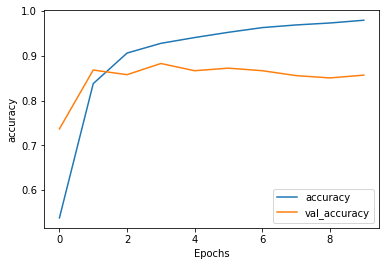

In [28]:
plot_graphs(history, 'accuracy')

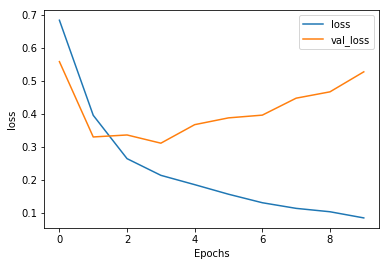

In [29]:
plot_graphs(history, 'loss')